<a href="https://colab.research.google.com/github/AnastasiiaDm/machine-learning/blob/main/DZ_10_clustering/Clustering2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors


In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SouthGermanCredit.asc', delim_whitespace=True)
df.head()

Mounted at /content/drive


<ipython-input-2-9d314fdc7b6f>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SouthGermanCredit.asc', delim_whitespace=True)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

In [26]:
# KMeans
inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

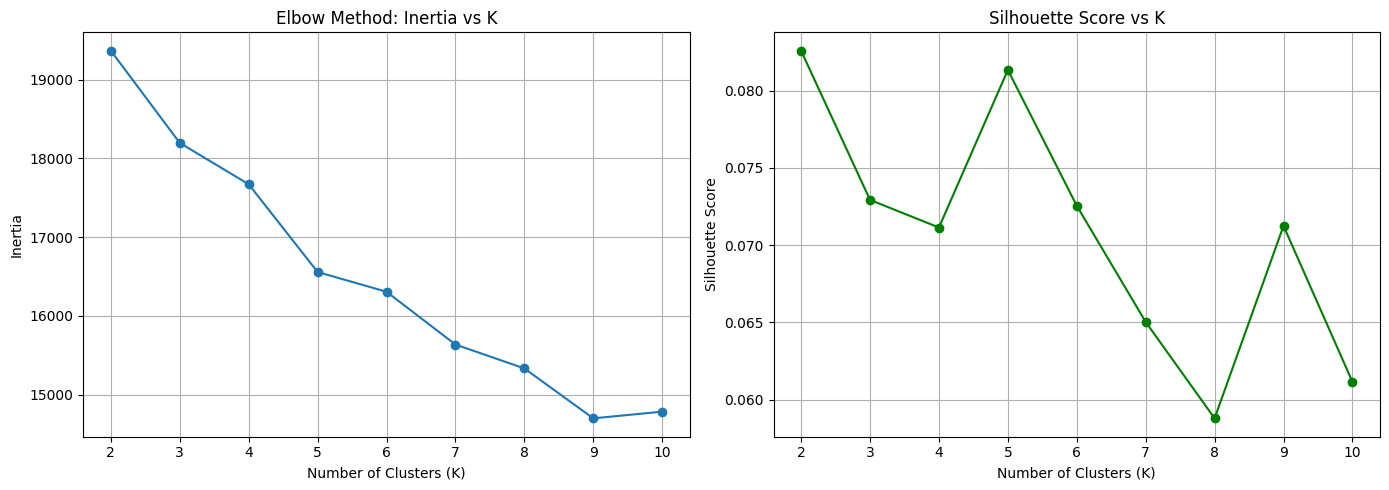

In [27]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o')
plt.title('Elbow Method: Inertia vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o', color='green')
plt.title('Silhouette Score vs K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.tight_layout()
plt.show()

In [23]:
n_clusters_range = range(2, 11)  # Try cluster counts from 2 to 10
results = []

for n_clusters in n_clusters_range:
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglo.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    ch = calinski_harabasz_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)

    results.append((n_clusters, ch, db))

df_results = pd.DataFrame(results, columns=["n_clusters", "calinski_harabasz", "davies_bouldin"])

# Sort by silhouette (or any metric of interest)
df_sorted = df_results.sort_values(by="davies_bouldin", ascending=False)

print(df_sorted.head())

   n_clusters  calinski_harabasz  davies_bouldin
2           4          54.677147        2.990398
0           2          56.211813        2.901299
5           7          49.063697        2.727479
3           5          53.625873        2.720146
8          10          42.683982        2.599867


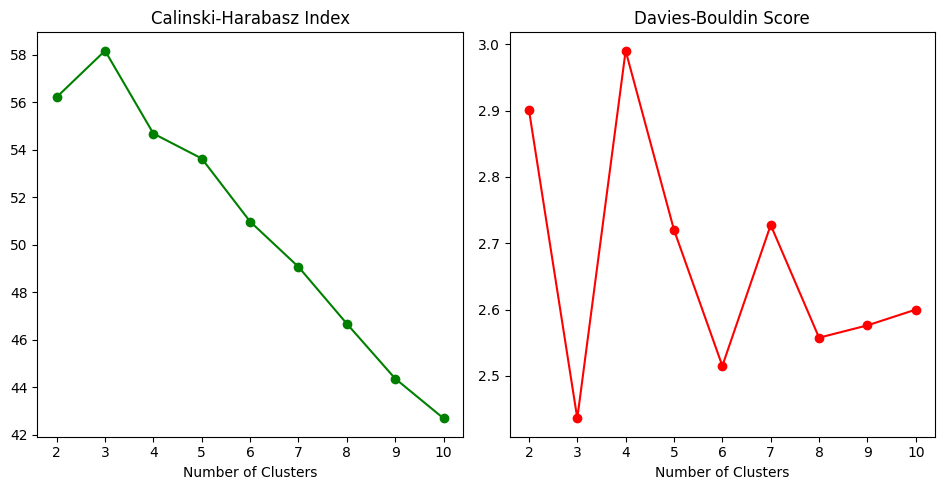

In [25]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 2)
plt.plot(df_results["n_clusters"], df_results["calinski_harabasz"], marker='o', color='green')
plt.title("Calinski-Harabasz Index")
plt.xlabel("Number of Clusters")

plt.subplot(1, 3, 3)
plt.plot(df_results["n_clusters"], df_results["davies_bouldin"], marker='o', color='red')
plt.title("Davies-Bouldin Score")
plt.xlabel("Number of Clusters")

plt.tight_layout()
plt.show()